# Quality Prediction for Weight Lifting Exercises

## Background

Using devices such as Jawbone Up, Nike FuelBand, and Fitbit it is now possible to collect a large amount of data about personal activity relatively inexpensively. These type of devices are part of the quantified self movement – a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it. In this project, your goal will be to use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants. They were asked to perform barbell lifts correctly and incorrectly in 5 different ways. More information is available from the website here: [link]http://groupware.les.inf.puc-rio.br/har (see the section on the Weight Lifting Exercise Dataset).

## DATA
The training data for this project are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv

The test data are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv

The data for this project come from this source: http://groupware.les.inf.puc-rio.br/har. 

### I would like to thank from my side for their generous contribution in allowing this data to be used for the assignment.

## GOAL

The goal of my project is to predict the manner in which they did the exercise. This is the "classe" variable in the training set.
## STEPS I FOLLOWED ...
1. Downloaded the above file and placed in pwd(present working directory).This also could be done as 
    download.file(url,destfile='./filename')


In [3]:
#loading files replacing blanks with NA
training=read.csv("pml-training.csv",na.strings=c("","NA","NULL"))
testing=read.csv("pml-testing.csv",na.strings=c("","NA","NULL"))

In [4]:
dim(training)

[1] 19622   160

In [5]:
head(training)

X,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,⋯,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,⋯,0.03,0.00,-0.02,192,203,-215,-17,654,476,A
2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,⋯,0.02,0.00,-0.02,192,203,-216,-18,661,473,A
3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,⋯,0.03,-0.02,0.00,196,204,-213,-18,658,469,A
4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,⋯,0.02,-0.02,0.00,189,206,-214,-16,658,469,A
5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,⋯,0.02,0.00,-0.02,189,206,-214,-17,655,473,A
6,carlitos,1323084232,304277,05/12/2011 11:23,no,12,1.45,8.06,-94.4,⋯,0.02,-0.02,-0.03,193,203,-215,-9,660,478,A


In [7]:
colnames(training)

[1] "X"                        "user_name"               
  [3] "raw_timestamp_part_1"     "raw_timestamp_part_2"    
  [5] "cvtd_timestamp"           "new_window"              
  [7] "num_window"               "roll_belt"               
  [9] "pitch_belt"               "yaw_belt"                
 [11] "total_accel_belt"         "kurtosis_roll_belt"      
 [13] "kurtosis_picth_belt"      "kurtosis_yaw_belt"       
 [15] "skewness_roll_belt"       "skewness_roll_belt.1"    
 [17] "skewness_yaw_belt"        "max_roll_belt"           
 [19] "max_picth_belt"           "max_yaw_belt"            
 [21] "min_roll_belt"            "min_pitch_belt"          
 [23] "min_yaw_belt"             "amplitude_roll_belt"     
 [25] "amplitude_pitch_belt"     "amplitude_yaw_belt"      
 [27] "var_total_accel_belt"     "avg_roll_belt"           
 [29] "stddev_roll_belt"         "var_roll_belt"           
 [31] "avg_pitch_belt"           "stddev_pitch_belt"       
 [33] "var_pitch_belt"           "avg_yaw_belt"            
 [35] "stddev_yaw_belt"          "var_yaw_belt"            
 [37] "gyros_belt_x"             "gyros_belt_y"            
 [39] "gyros_belt_z"             "accel_belt_x"            
 [41] "accel_belt_y"             "accel_belt_z"            
 [43] "magnet_belt_x"            "magnet_belt_y"           
 [45] "magnet_belt_z"            "roll_arm"                
 [47] "pitch_arm"                "yaw_arm"                 
 [49] "total_accel_arm"          "var_accel_arm"           
 [51] "avg_roll_arm"             "stddev_roll_arm"         
 [53] "var_roll_arm"             "avg_pitch_arm"           
 [55] "stddev_pitch_arm"         "var_pitch_arm"           
 [57] "avg_yaw_arm"              "stddev_yaw_arm"          
 [59] "var_yaw_arm"              "gyros_arm_x"             
 [61] "gyros_arm_y"              "gyros_arm_z"             
 [63] "accel_arm_x"              "accel_arm_y"             
 [65] "accel_arm_z"              "magnet_arm_x"            
 [67] "magnet_arm_y"             "magnet_arm_z"            
 [69] "kurtosis_roll_arm"        "kurtosis_picth_arm"      
 [71] "kurtosis_yaw_arm"         "skewness_roll_arm"       
 [73] "skewness_pitch_arm"       "skewness_yaw_arm"        
 [75] "max_roll_arm"             "max_picth_arm"           
 [77] "max_yaw_arm"              "min_roll_arm"            
 [79] "min_pitch_arm"            "min_yaw_arm"             
 [81] "amplitude_roll_arm"       "amplitude_pitch_arm"     
 [83] "amplitude_yaw_arm"        "roll_dumbbell"           
 [85] "pitch_dumbbell"           "yaw_dumbbell"            
 [87] "kurtosis_roll_dumbbell"   "kurtosis_picth_dumbbell" 
 [89] "kurtosis_yaw_dumbbell"    "skewness_roll_dumbbell"  
 [91] "skewness_pitch_dumbbell"  "skewness_yaw_dumbbell"   
 [93] "max_roll_dumbbell"        "max_picth_dumbbell"      
 [95] "max_yaw_dumbbell"         "min_roll_dumbbell"       
 [97] "min_pitch_dumbbell"       "min_yaw_dumbbell"        
 [99] "amplitude_roll_dumbbell"  "amplitude_pitch_dumbbell"
[101] "amplitude_yaw_dumbbell"   "total_accel_dumbbell"    
[103] "var_accel_dumbbell"       "avg_roll_dumbbell"       
[105] "stddev_roll_dumbbell"     "var_roll_dumbbell"       
[107] "avg_pitch_dumbbell"       "stddev_pitch_dumbbell"   
[109] "var_pitch_dumbbell"       "avg_yaw_dumbbell"        
[111] "stddev_yaw_dumbbell"      "var_yaw_dumbbell"        
[113] "gyros_dumbbell_x"         "gyros_dumbbell_y"        
[115] "gyros_dumbbell_z"         "accel_dumbbell_x"        
[117] "accel_dumbbell_y"         "accel_dumbbell_z"        
[119] "magnet_dumbbell_x"        "magnet_dumbbell_y"       
[121] "magnet_dumbbell_z"        "roll_forearm"            
[123] "pitch_forearm"            "yaw_forearm"             
[125] "kurtosis_roll_forearm"    "kurtosis_picth_forearm"  
[127] "kurtosis_yaw_forearm"     "skewness_roll_forearm"   
[129] "skewness_pitch_forearm"   "skewness_yaw_forearm"    
[131] "max_roll_forearm"         "max_picth_forearm"       
[133] "max_yaw_forearm"          "min_roll

In [8]:
#I believe that number of variables here is too large ie 160 and so I decided to remove irrevelant columns the first seven
training_1<-training[,-c(1:7)]
dim(training_1)

[1] 19622   153

No of rows 19622 is large and I want to shorten training data and also use the rest for cross validation.
    Our main motive is predicting the classe variable but still we have 153 columns which is too much.Next I am gonna remove the columns with most NA's and also I am gonna separate training and cross validation data.

In [11]:
training_2<- training_1[,colSums(is.na(training_1))<=5000]
dim(training_2)

[1] 19622    53

In [14]:
#split training and cross validation 
library(caret)

In [16]:
#as per course standard general convention for splitting
inTrain<-createDataPartition(training_2$classe,p=0.75,list=FALSE)
train<-training_2[inTrain,]
test<-training_2[-inTrain,]

In [17]:
dim(train)

[1] 14718    53

In [19]:
#Now still I am looking for most affecting columns and to see that I am looking for corelation based upon current data
library(corrplot)

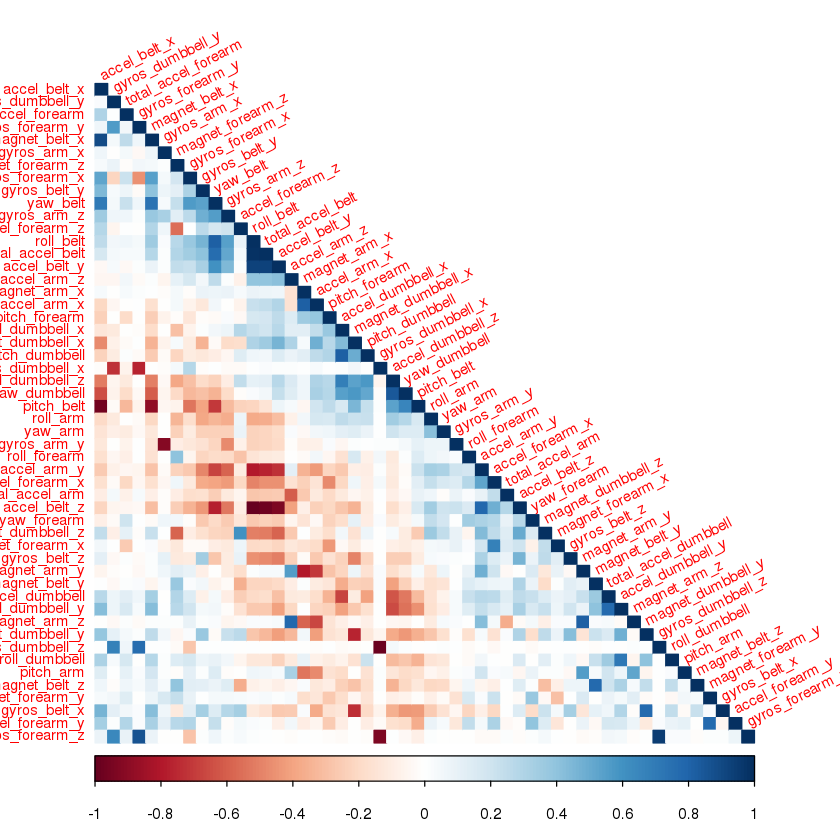

In [44]:
corr_Mat<-cor(train[,-53],)
#https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html
corrplot(corr_Mat, method = "color",type="lower",order="AOE",tl.cex=0.75,tl.srt=27)

In [46]:
highCorr<-train[,-findCorrelation(corr_Mat,cutoff=0.5)]
colnames(highCorr)

[1] "gyros_belt_x"        "gyros_belt_y"        "gyros_belt_z"       
 [4] "magnet_belt_y"       "roll_arm"            "yaw_arm"            
 [7] "total_accel_arm"     "gyros_arm_y"         "gyros_arm_z"        
[10] "magnet_arm_z"        "roll_dumbbell"       "pitch_dumbbell"     
[13] "roll_forearm"        "pitch_forearm"       "yaw_forearm"        
[16] "total_accel_forearm" "gyros_forearm_x"     "gyros_forearm_y"    
[19] "accel_forearm_z"     "magnet_forearm_x"    "magnet_forearm_y"   
[22] "classe"

In [47]:
dim(highCorr)

[1] 14718    22

## Finally 22 columns lets hope We're on the path
# Prediction Model
Here I have to predict among 5 classes: 'A','B','C','D','E' so I think I am gonna give a shot to decision tree and for that I am using C4.5 algorithm(Ranked 1 in top in 2008) using C50 package(extension of C4.5)

In [52]:
#https://cran.r-project.org/web/packages/C50/C50.pdf
library(C50)

In [68]:
model_1<-C5.0(classe ~ ., data=highCorr,rules=TRUE)
#summary(model_1)
test_model_1<-predict.C5.0(model_1,test,type="class")

In [71]:
ans_model_1<-as.data.frame(test_model_1)
dim(ans_model_1)

[1] 4904    1

In [73]:
#lets check our model validity. following matrix code requires e1071
confusion_Mat<-confusionMatrix(ans_model_1$test_model_1,test$classe)
confusion_Mat$table

          Reference
Prediction    A    B    C    D    E
         A 1323   31   12    7    8
         B   29  858   28   15    7
         C   26   23  784   52   17
         D   15   27   24  721   21
         E    2   10    7    9  848

In [76]:
accuracy_model_1<-sum((ans_model_1$test_model_1==test$classe))/dim(test)[1]
accuracy_model_1

[1] 0.9245514

Thats pretty good but I want better than that so I am searching for model to best fit my data  but of course no overfitting

## Now trying randomForest 
this is i think quite slow but lets hope it would be fine for me

In [83]:
#classification by randomforest
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [109]:
set.seed(2727)
model_2<-randomForest(classe~.,data=highCorr,importance=TRUE)
#summary(model_2)


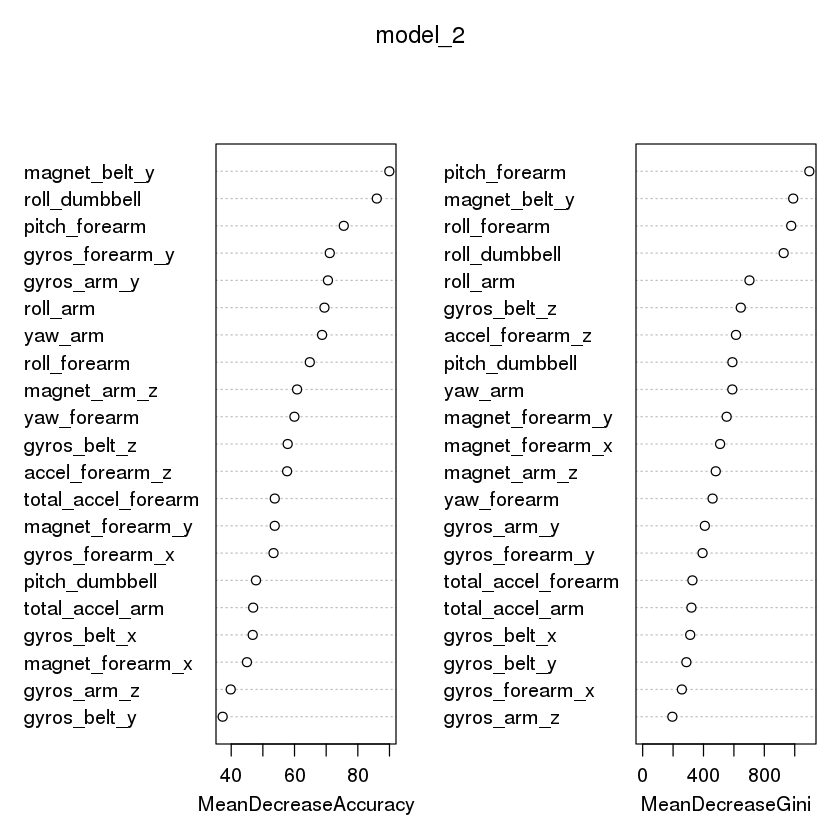

In [110]:
#short info plot 
varImpPlot(model_2)

In [111]:
test_model_2<-predict(model_2,test)

In [112]:
ans_model_2<-as.data.frame(test_model_2)
dim(ans_model_2)

[1] 4904    1

In [107]:
#lets check our model validity. following matrix code requires e1071
confusion_Mat<-confusionMatrix(ans_model_2$test_model_2,test$classe)
confusion_Mat$table

          Reference
Prediction    A    B    C    D    E
         A 1388    6    2    1    0
         B    3  939   10    0    0
         C    3    2  835   27    1
         D    1    0    8  775    2
         E    0    2    0    1  898

In [113]:
accuracy_model_2<-sum((ans_model_2$test_model_2==test$classe))/dim(test)[1]
accuracy_model_2

[1] 0.9863377

I think its great accuracy (98.63) so this model is best fiting.However still we can tune the random forest parameters so that we can achieve very high accuracy

In [117]:
print(testing_ans_model_2)

   testing_model_2
1                B
2                A
3                B
4                A
5                A
6                E
7                D
8                B
9                A
10               A
11               B
12               C
13               B
14               A
15               E
16               E
17               A
18               B
19               B
20               B
